# Introduction
This Lab called us to predict default status. There were two datasets that will be split into seprate tables each contain unique Information. The tables will be put into a database thats created and queried with SQL commands. SQL commands will then by analyzed in Pandas and will be modelled after.

In [1]:
# Importing Libraries to be used for now.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.cross_validation import train_test_split

/Users/carltonmezetin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Reading in dataset with pandas
credit_file = pd.read_csv('credit_info.csv', index_col='ID')
customer_file = pd.read_csv('customer_info.csv', index_col='ID')

In [3]:
# Separting datasets into 4 tables containing seprate information

pay_stat = credit_file[['PAY_STAT_SEP', 'PAY_STAT_AUG', 'PAY_STAT_JUL', 'PAY_STAT_JUN', 'PAY_STAT_MAY', 'PAY_STAT_APR']]
bill_hist = credit_file[['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR', 'BILL_PAY_SEP','BILL_PAY_AUG','BILL_PAY_JUL', 'BILL_PAY_JUN', 'BILL_PAY_MAY', 'BILL_PAY_APR',]]
cust_dem = customer_file[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
pay_hist = customer_file[['LIMIT_BAL', 'default payment next month']]

In [4]:
# Creating database called 'information'

import sqlite3
sqlite_db = 'information'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()
conn.commit()

In [5]:
# Importing pandas dataframes to sql tables in our database to be queried.
pay_hist.to_sql(name = 'payment_history', con = conn, if_exists = 'replace', index=True)
cust_dem.to_sql(name = 'customer_demographics', con = conn, if_exists = 'replace', index=True)
pay_stat.to_sql(name = 'payment_status', con = conn, if_exists = 'replace', index=True)
bill_hist.to_sql(name = 'billing_history', con = conn, if_exists = 'replace', index=True)

/Users/carltonmezetin/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [6]:
# Importing Library to allow us to run sql commands
from pandas.io import sql
# Looking at sql table billing history
sql.read_sql('select * from billing_history', conn).head()

,ID,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,BILL_PAY_SEP,BILL_PAY_AUG,BILL_PAY_JUL,BILL_PAY_JUN,BILL_PAY_MAY,BILL_PAY_APR
0,1,3913,3102.0,689,0,0,0,0,689,0,0,0,0
1,2,2682,1725.0,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,29239,14027.0,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,46990,48233.0,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,8617,5670.0,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
# Looking at sql table payment history
sql.read_sql('select * from payment_history', conn).head()

,ID,LIMIT_BAL,default payment next month
0,1,20000,1
1,2,120000,1
2,3,90000,0
3,4,50000,0
4,5,50000,0


In [8]:
# Looking at sql table payment status
sql.read_sql('select * from payment_status', conn).head()

,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR
0,1,2,2,-1,-1,-2,-2
1,2,-1,2,0,0,0,2
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,-1,0,-1,0,0,0


In [9]:
#Reading tables into Pandas for EDA 
payment_hist = sql.read_sql('select * from payment_history', conn)
billing_hist = sql.read_sql("select * from billing_history", conn)
payment_stat = sql.read_sql('select * from payment_status', conn)
customer_dem = sql.read_sql('select * from customer_demographics', conn)

## Querying and EDA


In [10]:
# Lets look at the Mean billing amounts per month for accounts receiveables.
billamt=sql.read_sql("select BILL_AMT_SEP, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR  from billing_history", conn).describe()
SEP=billamt.BILL_AMT_SEP.mean()
AUG=billamt.BILL_AMT_AUG.mean()
JUN=billamt.BILL_AMT_JUN.mean()
JUL=billamt.BILL_AMT_JUL.mean()
MAY=billamt.BILL_AMT_MAY.mean()
APR=billamt.BILL_AMT_APR.mean()
# Printing the average Billing amounts
print 'Billing Amount averages by Month'
print 'April ' + str (APR)
print 'May ' + str (MAY)
print 'June ' + str(JUN)
print 'July ' + str(JUL)
print 'August ' + str(AUG)
print 'September' + str(SEP)

Billing Amount averages by Month
April 102251.514742
May 130875.444592
June 116883.319388
July 217013.380278
August 214021.679772
September130852.680184


/Users/carltonmezetin/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [11]:
# Median Age of customer
med_age = sql.read_sql('select AGE from customer_demographics', conn).median()
print ('Median Customer Age ' + str(med_age))
mod_age = sql.read_sql('select AGE from customer_demographics', conn).mode()
print ('Most represetned Age ' + str(mod_age))

Median Customer Age AGE    34.0
dtype: float64
Most represetned Age    AGE
0   29


In [12]:
# The avegae bill amount per month
# Moving Average
data = pd.DataFrame({'Month':['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'], 'AVG':[APR, MAY, JUN, JUL, AUG, SEP]})
pd.rolling_mean(data, 2)

/Users/carltonmezetin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()


,AVG,Month
0,NaN,APR
1,116563.479667,MAY
2,123879.381990,JUN
3,166948.349833,JUL
4,215517.530025,AUG
5,172437.179978,SEP


/Users/carltonmezetin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  from ipykernel import kernelapp as app


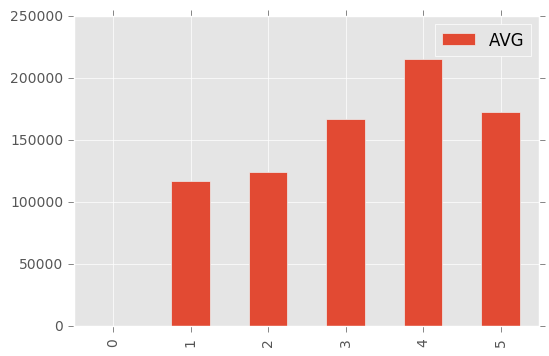

In [13]:
#Moving Average Plotted
pd.rolling_mean(data, 2).plot(kind='bar')

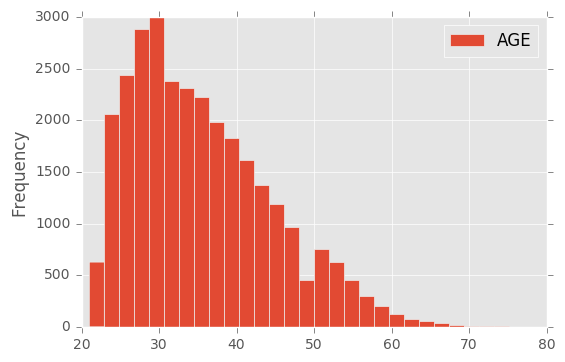

In [14]:
#Distribution of Ages of the customers
cust_age = sql.read_sql('select AGE from customer_demographics', conn)
cust_age.plot(kind='hist', bins=30)
# No, left skew. Showing use the age of most of our customers are between 25 and 35

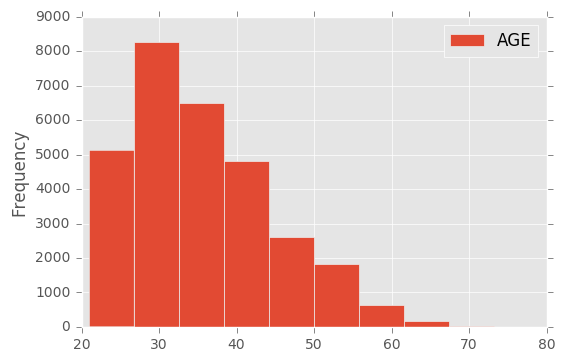

In [15]:
# Same distrubtion with less bins, to see if it changes.
cust_age.plot(kind='hist', bins=10)

In [49]:
#Renaming column
default = sql.read_sql('select * from payment_history', conn)
default.rename(columns={'default payment next month': 'next_default'}).head()

,ID,LIMIT_BAL,next_default
0,1,20000,1
1,2,120000,1
2,3,90000,0
3,4,50000,0
4,5,50000,0


In [17]:
# looking at payment status as for modeling
payst = sql.read_sql('select * from payment_status ', conn).head()
payst.head()

,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR
0,1,2,2,-1,-1,-2,-2
1,2,-1,2,0,0,0,2
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,-1,0,-1,0,0,0


# Modeling

In [18]:
#Tables to merge to later build model with information
sql.read_sql('select * from payment_history', conn).head()
payst = sql.read_sql('select * from payment_status ', conn).head()

In [19]:
# Sql command joing two tables to get desired information for modeling
miss_pay = sql.read_sql('SELECT * FROM payment_history JOIN payment_status ON payment_history.ID=payment_status.ID;', conn)
#ON Orders.CustomerID=Customers.CustomerID; 

In [20]:
# creating X and y for modeling
# would like to predict if the would default status
X = miss_pay.drop(miss_pay[['default payment next month', 'ID']], axis=1)
y = miss_pay['default payment next month']

In [21]:
# checking for un-balanced classes
print (y.value_counts())
# Lets use stratified cross validation to deal with unbalaced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

0    23364
1     6636
Name: default payment next month, dtype: int64


In [22]:
# Lets used randome forest, we will be trying to predict in a customer will default or not
from sklearn.ensemble import RandomForestClassifier

In [23]:
rdf = RandomForestClassifier(n_jobs=-1, random_state=5)
rdf.fit(X_train, y_train)
score = rdf.score(X_train, y_train)
print 'Score ' + str(score * 100)

Score 86.2888888889


In [24]:
#rdf.fit(X_train, y_train)

In [25]:
rdc = RandomForestClassifier

In [32]:
#Lets see if our score goes up if we add customer demgraphics
# Back to SQL
dem = sql.read_sql('SELECT * FROM customer_demographics JOIN ;', conn)

,ID,SEX,EDUCATION,MARRIAGE,AGE
0,1,2,2.0,1,24
1,2,2,2.0,2,26
2,3,2,2.0,2,34
3,4,2,2.0,1,37
4,5,1,2.0,1,57


In [38]:
#lets merge our new dataframe to our X
new_df = pd.concat([dem,X], axis=1)
#Now lets Retrain our train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y)

In [48]:
#Lets fit random forest again
rdf2 = RandomForestClassifier(n_jobs=-1, random_state=5, max_features=2)
rdf2.fit(X_train2, y_train2)
score2 = rdf2.score(X_train2, y_train2)
print 'Score ' + str(score2 * 100)

Score 86.5777777778


# Conclusion
Looks like even with customer demographics our model didnt do much better. This Lab mainly focused on the SQL to pandas manipulation of data.